In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
df = pd.read_csv('/content/final_data.csv')

In [0]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [0]:
target_cols = [
    'anxious', 'bored', 'gloomy', 'stressed', 'upset', 'tired', 'envious',
    'inferior'
]

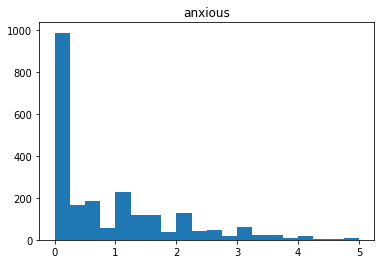

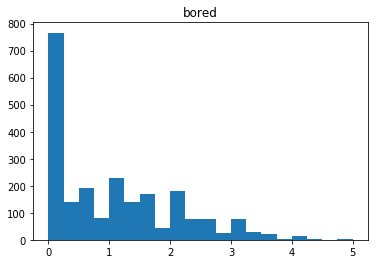

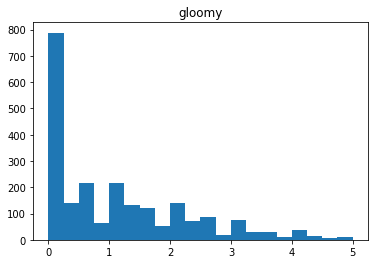

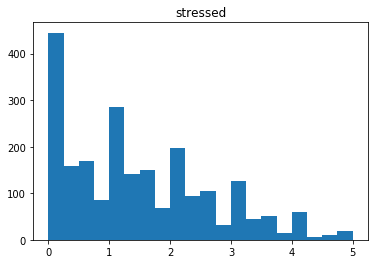

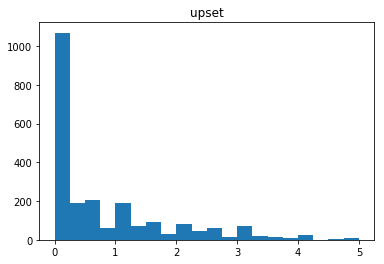

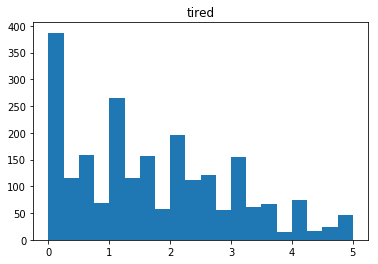

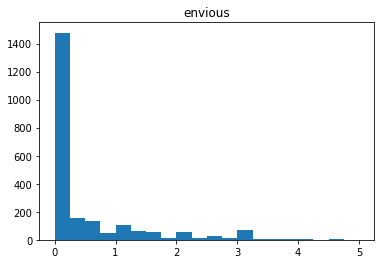

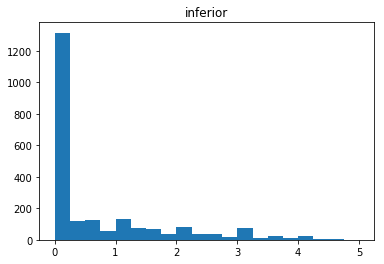

In [0]:
for col in target_cols:
    plt.hist(df[col].values, bins=20)
    plt.title(col)
    plt.show()

In [0]:
pca = PCA(n_components=3)
pca_x = pca.fit_transform(df[target_cols].values)

NameError: ignored

In [0]:
from sklearn.cluster import KMeans

In [0]:
from sklearn.metrics import silhouette_score
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,9):
    km = KMeans(n_clusters=i, random_state=0).fit(pca_x)
    preds = km.predict(pca_x)    
    silhouette = silhouette_score(pca_x,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 2: 0.501195534744
Silhouette score for number of cluster(s) 3: 0.380023833526
Silhouette score for number of cluster(s) 4: 0.32130219737
Silhouette score for number of cluster(s) 5: 0.328648281666
Silhouette score for number of cluster(s) 6: 0.318933713023
Silhouette score for number of cluster(s) 7: 0.295100067393
Silhouette score for number of cluster(s) 8: 0.290961185011


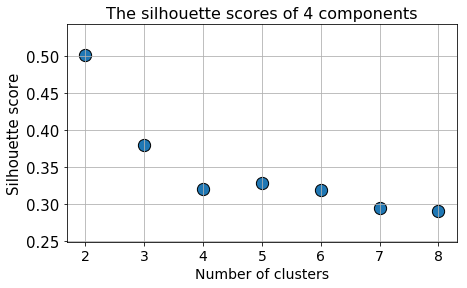

In [0]:
plt.figure(figsize=(7,4))
plt.title("The silhouette scores of 4 components",fontsize=16)
plt.scatter(x=[i for i in range(2,9)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,9)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_x)
y = kmeans.predict(pca_x)

In [0]:
kmeans.cluster_centers_

array([[-1.27087595,  0.02187593, -0.01581062],
       [ 3.10379583, -0.05342648,  0.03861349]])

In [0]:
from collections import Counter
print(Counter(y))

Counter({0: 1607, 1: 658})


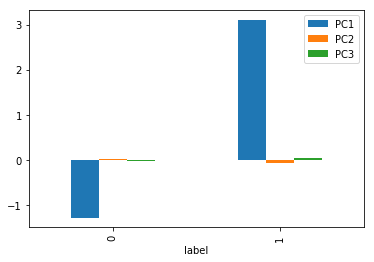

In [0]:
df1 = pd.DataFrame(pca_x)
df1.columns =  ['PC1','PC2','PC3']
df1['label'] = y
df1.groupby('label').mean().plot.bar()

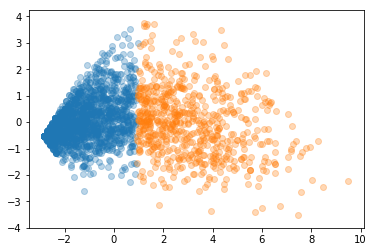

In [0]:
df1 = pd.DataFrame({'x1':pca_x[:,0],'x2':pca_x[:,1],'y':y})
for i in [0,1,2]:
    tmp = df1[df1['y']==i]
    plt.scatter(tmp['x1'].tolist(),tmp['x2'].tolist(), alpha=0.3)
plt.show()

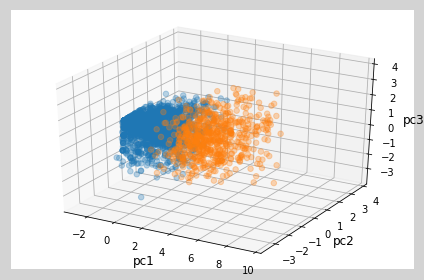

In [0]:
df1 = pd.DataFrame({'x1':pca_x[:,0],'x2':pca_x[:,1],'x3':pca_x[:,2],'y':y})
from mpl_toolkits.mplot3d import axes3d

plt.figure('3D Scatter', facecolor='lightgray')
ax3d = plt.gca(projection='3d')
ax3d.set_xlabel('pc1', fontsize=12)
ax3d.set_ylabel('pc2', fontsize=12)
ax3d.set_zlabel('pc3', fontsize=12)
for i in [0, 1,2]:
    tmp = df1[df1['y'] == i]
    ax3d.scatter(tmp['x1'].tolist(),
                 tmp['x2'].tolist(),
                 tmp['x3'].tolist(),
                 s=30,
                 marker='o',
                 alpha=0.3,
                 cmap='jet')
plt.tight_layout()
plt.show()

In [0]:
!pip install plotly.express

In [0]:
import plotly.express as px
fig = px.scatter_3d(df1, x='x1', y='x2', z='x3',
              color='y',opacity=0.5)
fig.show()

In [0]:
df['date'] = pd.to_datetime(df['date'])
df['dayofweek'] = df['date'].dt.dayofweek
df['dayofmonth'] = df['date'].dt.day

In [0]:
feat_cols = ['dayofweek','dayofmonth','frequency_communication','frequency_games & entertainment','frequency_lifestyle','frequency_news & information outlet',
    'frequency_social network','frequency_utility & tools',
    'cat_duration_communication', 'cat_duration_games & entertainment','cat_duration_lifestyle','cat_duration_news & information outlet', 
    'cat_duration_social network',	'cat_duration_utility & tools',
    'dur_pro_communication','dur_pro_games & entertainment','dur_pro_lifestyle','dur_pro_news & information outlet',	'dur_pro_social network',	
    'dur_pro_utility & tools',
    'freq_pro_communication','freq_pro_games & entertainment','freq_pro_lifestyle','freq_pro_news & information outlet','freq_pro_social network',
    'freq_pro_utility & tools','recency_communication','recency_games & entertainment','recency_lifestyle',
    'recency_news & information outlet','recency_social network','recency_utility & tools','monetary_communication','monetary_games & entertainment',
    'monetary_lifestyle','monetary_news & information outlet','monetary_social network','monetary_utility & tools','earliest_time_communication',
    'earliest_time_games & entertainment',  'earliest_time_lifestyle',  'earliest_time_news & information outlet',  
    'earliest_time_social network',  'earliest_time_utility & tools','max_duration_communication',
    'max_duration_games & entertainment','max_duration_lifestyle','max_duration_news & information outlet','max_duration_social network',
    'max_duration_utility & tools','std_duration_communication','std_duration_games & entertainment','std_duration_lifestyle','std_duration_news & information outlet',
    'std_duration_social network','std_duration_utility & tools','min_duration_communication','min_duration_games & entertainment','min_duration_lifestyle',
    'min_duration_news & information outlet','min_duration_social network','min_duration_utility & tools','var_duration_communication','var_duration_games & entertainment',
    'var_duration_lifestyle','var_duration_news & information outlet','var_duration_social network','var_duration_utility & tools']

In [0]:
ut_cols = ['frequency_utility & tools',	'cat_duration_utility & tools','dur_pro_utility & tools',
'freq_pro_utility & tools','recency_utility & tools','monetary_utility & tools', 'earliest_time_utility & tools',
    'max_duration_utility & tools','std_duration_utility & tools','min_duration_utility & tools','var_duration_utility & tools']

In [0]:
for col in ut_cols:
    plt.hist(df[col].values, bins=20)
    plt.title(col)
    plt.show()

# New Section

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features =scaler.fit_transform(df[feat_cols].values)

In [0]:
#np.unique(y, return_counts=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [0]:
#first fitted model
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,random_state = 0)
rf = RandomForestClassifier(n_estimators=50,max_depth=5)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
from sklearn.metrics import classification_report
print('classification on training set')
print('____________________________________________')
print(classification_report(y_train, y_train_pred))


print('classification on test set')
print('____________________________________________')
print(classification_report(y_test,y_test_pred))

from sklearn.metrics import accuracy_score
print('accuracy score')
print(accuracy_score(y_test,y_test_pred))


classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1301
           1       0.99      0.18      0.30       511

   micro avg       0.77      0.77      0.77      1812
   macro avg       0.87      0.59      0.58      1812
weighted avg       0.82      0.77      0.70      1812

classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.70      0.97      0.81       306
           1       0.65      0.12      0.20       147

   micro avg       0.69      0.69      0.69       453
   macro avg       0.67      0.54      0.50       453
weighted avg       0.68      0.69      0.61       453

accuracy score
0.6931567328918322


In [0]:
#use grid search

param_grid = {
    'n_estimators':[10,20,50,100,300,500],
    'max_depth':[3,7,10,20,30]
}

gs = GridSearchCV(estimator=rf,
                        param_grid=param_grid,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)
gs.fit(X_train, y_train)

estimator = gs.best_estimator_

y_train_pred = estimator.predict(X_train)
y_test_pred = estimator.predict(X_test)

print('classification on training set')
print('____________________________________________')
print(classification_report(y_train, y_train_pred))
print()
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test,y_test_pred))
print('Accuracy score')
accuracy_score(y_test,y_test_pred)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.0min finished


classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1301
           1       1.00      1.00      1.00       511

   micro avg       1.00      1.00      1.00      1812
   macro avg       1.00      1.00      1.00      1812
weighted avg       1.00      1.00      1.00      1812

()
classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       306
           1       0.74      0.19      0.30       147

   micro avg       0.72      0.72      0.72       453
   macro avg       0.73      0.58      0.56       453
weighted avg       0.72      0.72      0.65       453

Accuracy score


0.7152317880794702

In [0]:
##under sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_undersample, y_undersample = rus.fit_resample(features,
                                                    y)

In [0]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersample, y_undersample,
                                                    test_size=0.2,
                                                    shuffle=True,random_state = 0)

In [0]:
rf = RandomForestClassifier(n_estimators=50,max_depth=5)
rf.fit(X_train_under, y_train_under)
y_train_under_pred = rf.predict(X_train_under)
y_test_under_pred = rf.predict(X_test_under)
print('classification on training set')
print('____________________________________________')
print(classification_report(y_train_under, y_train_under_pred))
print()
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test_under,y_test_under_pred))
print('Accuracy score')
print(accuracy_score(y_test_under,y_test_under_pred))


param_grid = {
    'n_estimators':[10,20,50,100,300,500],
    'max_depth':[3,7,10,20,30]
}

rf = RandomForestClassifier()
gs = GridSearchCV(estimator=rf,
                        param_grid=param_grid,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

gs.fit(X_train_under, y_train_under)
estimator = gs.best_estimator_
y_train_under_pred = estimator.predict(X_train_under)
y_test_under_pred = estimator.predict(X_test_under)


print('classification on training set')
print('____________________________________________')
print(classification_report(y_train_under, y_train_under_pred))
print()
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test_under,y_test_under_pred))
print('Accuracy score')
print(accuracy_score(y_test_under,y_test_under_pred))

classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       525
           1       0.88      0.72      0.79       527

   micro avg       0.81      0.81      0.81      1052
   macro avg       0.82      0.81      0.81      1052
weighted avg       0.82      0.81      0.81      1052

()
classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       133
           1       0.65      0.54      0.59       131

   micro avg       0.63      0.63      0.63       264
   macro avg       0.63      0.63      0.63       264
weighted avg       0.63      0.63      0.63       264

Accuracy score
0.6287878787878788
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       527

   micro avg       1.00      1.00      1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052

()
classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       133
           1       0.67      0.67      0.67       131

   micro avg       0.67      0.67      0.67       264
   macro avg       0.67      0.67      0.67       264
weighted avg       0.67      0.67      0.67       264

Accuracy score
0.6704545454545454


In [0]:
##oversampling 
from imblearn.over_sampling import BorderlineSMOTE 
bls = BorderlineSMOTE(random_state=0)
X_oversample, y_oversample = bls.fit_resample(features,
                                                    y)


X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_oversample, y_oversample,
                                                    test_size=0.2,
                                                    shuffle=True,random_state = 0)



rf = RandomForestClassifier(n_estimators=50,max_depth=5)
rf.fit(X_train_over, y_train_over)
y_train_over_pred = rf.predict(X_train_over)
y_test_over_pred = rf.predict(X_test_over)
print('classification on training set')
print('____________________________________________')
print(classification_report(y_train_over, y_train_over_pred))
print()
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test_over,y_test_over_pred))
print('Accuracy score')
print(accuracy_score(y_test_over,y_test_over_pred))


param_grid = {
    'n_estimators':[10,20,50,100,300,500],
    'max_depth':[3,7,10,20,30]
}

rf = RandomForestClassifier()
gs = GridSearchCV(estimator=rf,
                        param_grid=param_grid,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

gs.fit(X_train_over, y_train_over)
estimator = gs.best_estimator_
y_train_over_pred = estimator.predict(X_train_over)
y_test_over_pred = estimator.predict(X_test_over)


print('classification on training set')
print('____________________________________________')
print(classification_report(y_train_over, y_train_over_pred))
print()
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test_over,y_test_over_pred))
print('Accuracy score')
print(accuracy_score(y_test_over,y_test_over_pred))

classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1302
           1       0.81      0.79      0.80      1269

   micro avg       0.80      0.80      0.80      2571
   macro avg       0.80      0.80      0.80      2571
weighted avg       0.80      0.80      0.80      2571

()
classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       305
           1       0.75      0.70      0.72       338

   micro avg       0.72      0.72      0.72       643
   macro avg       0.72      0.72      0.72       643
weighted avg       0.72      0.72      0.72       643

Accuracy score
0.7169517884914464
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished


classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1302
           1       1.00      1.00      1.00      1269

   micro avg       1.00      1.00      1.00      2571
   macro avg       1.00      1.00      1.00      2571
weighted avg       1.00      1.00      1.00      2571

()
classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       305
           1       0.89      0.85      0.87       338

   micro avg       0.86      0.86      0.86       643
   macro avg       0.86      0.86      0.86       643
weighted avg       0.86      0.86      0.86       643

Accuracy score
0.8631415241057543


In [0]:
#method 2 - combination of over and under sampling 
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_SMOTETomek, y_SMOTETomek = smote_tomek.fit_resample(features,
                                                    y)


X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_SMOTETomek, y_SMOTETomek,
                                                    test_size=0.2,
                                                    shuffle=True,random_state = 0)

rf = RandomForestClassifier(n_estimators=50,max_depth=5)
rf.fit(X_train_m2, y_train_m2)
y_train_m2_pred = rf.predict(X_train_m2)
y_test_m2_pred = rf.predict(X_test_m2)
print('classification on training set')
print('____________________________________________')
print(classification_report(y_train_m2, y_train_m2_pred))
print()
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test_m2,y_test_m2_pred))
print('Accuracy score')
print(accuracy_score(y_test_m2,y_test_m2_pred))

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[10,20,50,100,300,500],
    'max_depth':[3,7,10,20,30]
}

rf = RandomForestClassifier()
gs = GridSearchCV(estimator=rf,
                        param_grid=param_grid,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

gs.fit(X_train_m2, y_train_m2)
estimator = gs.best_estimator_
y_train_m2_pred = estimator.predict(X_train_m2)
y_test_m2_pred = estimator.predict(X_test_m2)


print('classification on training set')
print('____________________________________________')
print(classification_report(y_train_m2, y_train_m2_pred))
print()
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test_m2,y_test_m2_pred))
print('Accuracy score')
print(accuracy_score(y_test_m2,y_test_m2_pred))

classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1274
           1       0.82      0.77      0.80      1254

   micro avg       0.80      0.80      0.80      2528
   macro avg       0.81      0.80      0.80      2528
weighted avg       0.81      0.80      0.80      2528

()
classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       306
           1       0.71      0.70      0.70       326

   micro avg       0.70      0.70      0.70       632
   macro avg       0.70      0.70      0.70       632
weighted avg       0.70      0.70      0.70       632

Accuracy score
0.6962025316455697
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.4min finished


classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1254

   micro avg       1.00      1.00      1.00      2528
   macro avg       1.00      1.00      1.00      2528
weighted avg       1.00      1.00      1.00      2528

()
classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       306
           1       0.85      0.79      0.82       326

   micro avg       0.82      0.82      0.82       632
   macro avg       0.82      0.82      0.82       632
weighted avg       0.82      0.82      0.82       632

Accuracy score
0.819620253164557


In [0]:
#method 1 - combination of over and under sampling 
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_SMOTEENN, y_SMOTEENN = smote_enn.fit_resample(features,
                                                    y)


X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_SMOTEENN, y_SMOTEENN,
                                                    test_size=0.2,
                                                    shuffle=True,random_state = 0)

rf = RandomForestClassifier(n_estimators=50,max_depth=5)
#rf.fit(X_train_m1, y_train_m1)
#y_train_m1_pred = rf.predict(X_train_m1)
#y_test_m1_pred = rf.predict(X_test_m1)
#print('classification on training set')
#print('____________________________________________')
#print(classification_report(y_train_m1, y_train_m1_pred))
#print()
#print('classification on test set')
#print('____________________________________________')
#print(classification_report(y_test_m1,y_test_m1_pred))
#print('Accuracy score')
#print(accuracy_score(y_test_m1,y_test_m1_pred))

param_grid = {
    'n_estimators':[10,20,50,100,300,500],
    'max_depth':[3,7,10,20,30]
}


gs = GridSearchCV(estimator=rf,
                        param_grid=param_grid,
                        cv=10,
                        verbose=1,
                        n_jobs=-1)

gs.fit(X_train_m1, y_train_m1)
estimator = gs.best_estimator_
y_train_m1_pred = estimator.predict(X_train_m1)
y_test_m1_pred = estimator.predict(X_test_m1)


print('classification on training set')
print('____________________________________________')
print(classification_report(y_train_m1, y_train_m1_pred))
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test_m1,y_test_m1_pred))
print('Accuracy score')
print(accuracy_score(y_test_m1,y_test_m1_pred))


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.7min finished


classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00      1003

   micro avg       1.00      1.00      1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435

classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       123
           1       0.88      0.99      0.93       236

   micro avg       0.90      0.90      0.90       359
   macro avg       0.93      0.86      0.88       359
weighted avg       0.91      0.90      0.90       359

Accuracy score
0.9025069637883009


In [0]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf.fit(X_train_m1, y_train_m1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 5.0MB/s 


In [0]:
##using permutation importance
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf).fit(X_test_m1, y_test_m1)
eli5.show_weights(perm, top = 68)

Weight,Feature
0.0128 ± 0.0076,x1
0.0089 ± 0.0082,x34
0.0078 ± 0.0055,x16
0.0072 ± 0.0160,x44
0.0056 ± 0.0000,x52
0.0050 ± 0.0065,x30
0.0045 ± 0.0091,x18
0.0045 ± 0.0103,x56
0.0039 ± 0.0144,x54
0.0039 ± 0.0027,x6


'dur_pro_lifestyle'

Feature ranking:
1. feature 42 (0.034718)
2. feature 21 (0.030780)
3. feature 56 (0.029976)
4. feature 2 (0.028861)
5. feature 1 (0.025501)
6. feature 44 (0.025238)
7. feature 14 (0.024658)
8. feature 38 (0.024456)
9. feature 62 (0.023418)
10. feature 19 (0.023296)
11. feature 8 (0.023232)
12. feature 30 (0.022514)
13. feature 25 (0.022362)
14. feature 57 (0.020317)
15. feature 61 (0.019940)
16. feature 55 (0.018446)
17. feature 7 (0.017995)
18. feature 27 (0.017665)
19. feature 24 (0.017306)
20. feature 48 (0.017136)
21. feature 37 (0.017118)
22. feature 26 (0.016940)
23. feature 43 (0.016735)
24. feature 12 (0.016652)
25. feature 6 (0.016623)
26. feature 49 (0.016609)
27. feature 50 (0.016405)
28. feature 36 (0.015969)
29. feature 31 (0.015784)
30. feature 3 (0.015713)
31. feature 18 (0.015699)
32. feature 67 (0.015680)
33. feature 54 (0.015651)
34. feature 32 (0.015509)
35. feature 13 (0.015227)
36. feature 51 (0.015156)
37. feature 33 (0.014401)
38. feature 63 (0.014354)
39. featur

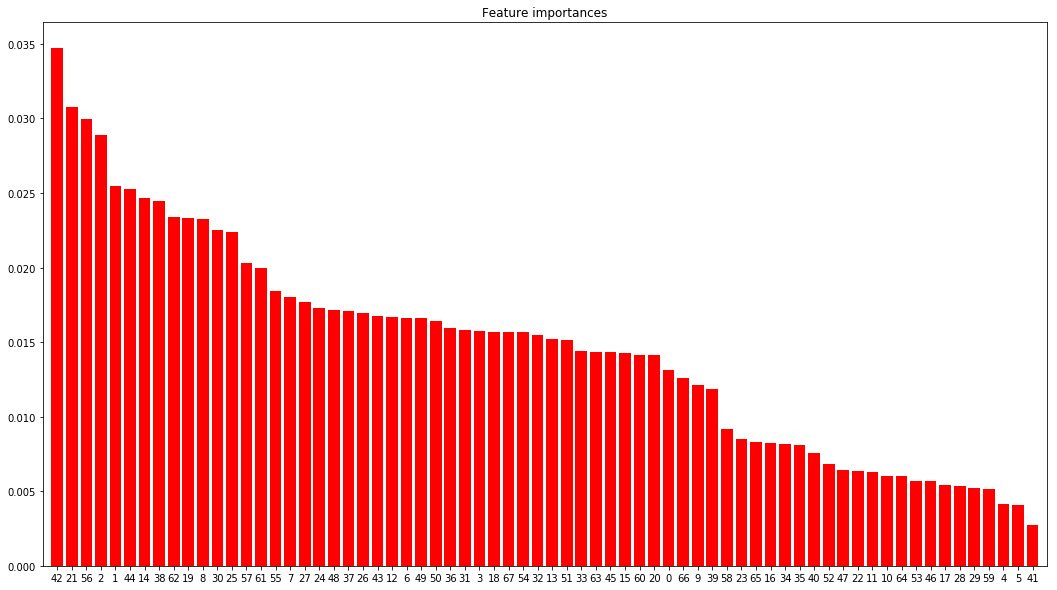

In [0]:
#after resampling rf is trained, get the feature importance

importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_m1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18,10))
plt.title("Feature importances")
plt.bar(range(X_train_m1.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_m1.shape[1]), indices)
plt.xlim([-1, X_train_m1.shape[1]])
plt.show()

In [0]:
## dropping features based on permutation
from sklearn.feature_selection import SelectFromModel

sel1 = SelectFromModel(
    PermutationImportance(rf, cv=5),
    threshold=0.001,
).fit(X_SMOTEENN, y_SMOTEENN)
X_trans = sel1.transform(X_SMOTEENN)
X_train_pm, X_test_pm, y_train_pm, y_test_pm = train_test_split(X_SMOTEENN, y_SMOTEENN,
                                                    test_size=0.2,
                                                    shuffle=True, random_state=0)
rf = RandomForestClassifier(n_estimators=50,max_depth=5)
rf.fit(X_train_pm, y_train_pm)
param_grid = {
    'n_estimators':[10,20,50,100,300,500],
    'max_depth':[3,7,10,20,30]
}

gs = GridSearchCV(estimator=rf,
                        param_grid=param_grid,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

gs.fit(X_train_pm, y_train_pm)
estimator = gs.best_estimator_
y_train_pm_pred = estimator.predict(X_train_pm)
y_test_pm_pred = estimator.predict(X_test_pm)

print('classification on training set')
print('____________________________________________')
print(classification_report(y_train_pm, y_train_pm_pred))
print()
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test_pm,y_test_pm_pred))
print('Accuracy score')
print(accuracy_score(y_test_pm,y_test_pm_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished


classification on training set
____________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00      1003

   micro avg       1.00      1.00      1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435

()
classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       123
           1       0.87      0.98      0.92       236

   micro avg       0.89      0.89      0.89       359
   macro avg       0.91      0.85      0.87       359
weighted avg       0.90      0.89      0.89       359

Accuracy score
0.8913649025069638


In [0]:
## dropping features based on rf feature importance
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.02)

# Train the selector
sfm.fit()

X_important_train = sfm.transform(X_train_under)
X_important_test = sfm.transform(X_test_under)
rf = RandomForestClassifier(n_estimators=50,max_depth=5)
rf.fit(X_important_train, y_train_under)
param_grid = {
    'n_estimators':[10,20,50,100,300,500],
    'max_depth':[3,7,10,20,30]
}


gs = GridSearchCV(estimator=rf,
                        param_grid=param_grid,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

gs.fit(X_important_train, y_train_under)
estimator = gs.best_estimator_
y_train_under_pred = estimator.predict(X_important_train)
y_test_under_pred = estimator.predict(X_important_test)

print('classification on training set')
print('____________________________________________')
print(classification_report(y_train_under, y_train_under_pred))
print()
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test_under,y_test_under_pred))
print('Accuracy score')
print(accuracy_score(y_test_under,y_test_under_pred))

In [0]:
print('classification on test set')
print('____________________________________________')
print(classification_report(y_test_pm,y_test_svm_pred))
print('Accuracy score')
print(accuracy_score(y_test_pm,y_test_svm_pred))

classification on test set
____________________________________________
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       123
           1       0.91      0.97      0.94       236

   micro avg       0.92      0.92      0.92       359
   macro avg       0.92      0.89      0.90       359
weighted avg       0.92      0.92      0.91       359

Accuracy score
0.9164345403899722


In [0]:
#using a SVM

from sklearn.svm import SVC
model  = SVC()
model.fit(X_train_pm, y_train_pm)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train_pm, y_train_pm)
grid.best_estimator_

grid.fit(X_train_pm, y_train_pm)
estimator = grid.best_estimator_
y_train_svm_pred = estimator.predict(X_train_pm)
y_test_svm_pred = estimator.predict(X_test_pm)
